# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №4 - Метод k-средних, предобработка признаков


###### <hr\>
**Общая информация**

**Срок сдачи:** 28 ноября 2018, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 28 ноября, -4 балла после 06:00 5 декабря, -6 баллов после 06:00 12 декабря, -8 баллов после 19 декабря

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb @alkhamush
Дополнительно нужно просто скинуть ссылку в slack в личный чат

Используйте данный Ipython Notebook при оформлении домашнего задания.

# Имплементация K-means

Пользуясь наработками выше, имплементируйте метод k-means.  
При инициализации необходимо задавать количество кластеров, функцию расстояния между кластерами (для оригинального k-means - евклидово расстояние) и начальное состояние генератора случайных чисел.

После обучения, среди атрибутов класса `Kmeans` должны появится
* Метки кластеров для объектов
* Координаты центройдов кластеров

k-means - это алгоритм **кластеризации**, а не классификации, а посему метод `.predict()` в нем фактически не нужен, но он может возвращать метки ближайшего кластера для объектов.

###### Задание 1 (2 баллов)
Имплементируйте метод k-means. Задание считается выполненным, если Ваша реализация работает быстрее реализации из sklearn.

Теория для выполнения задания 2 и 3 остаётся на самостоятельное изучение. Теории немного и она совсем простая.

###### Задание 2 (2 балла)
Имплементируйте класс MiniBatchKMeans, который является классом наследником Kmeans.

###### Задание 3 (2 балла)
Превратите k-means в k-means++. Для этого нужно реализовать метод в классе Kmeans, который будет инициализировать более "хорошие" значения центроидов. Чтобы использовался метод k-means++, в параметр init необходимо передать строковое значение 'k-means' (по умолчанию 'random').

###### Задание 4 (2 балла)
В пункте "Проверка корректности метода" нужно нарисовать графики, которые показывают зависимость времени выполнения алгоритма от количества сэмплов. Графики должны быть  нарисованы для различных комбинаций реализаций алгоритма (k-means, k-means++, k-means с MiniBatchKMeans, k-means++ с MiniBatchKMeans). График достаточно построить на 5-10 точках.

###### Задание 5 (2 балла)
В пункте "Применение K-means на реальных данных" нужно сравнить различные реализации k-means (k-means, k-means++, k-means с MiniBatchKMeans, k-means++ с MiniBatchKMeans). После чего написать вывод, в котором должно быть объяснение того, почему один алгоритм оказался лучше остальных или почему не было выявлено лучшего алгоритма.

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw4.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст. В противном случае -1 балл
<hr\>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import sklearn as sk
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

%load_ext pycodestyle_magic

In [54]:
#%%pycodestyle


class MyKmeans:

    def __init__(self, k=2, metric='euclidean',
                 max_iter=1000, random_state=None, init='random'):
        """
        Инициализация метода
        :k - количество кластеров
        :metric - функция расстояния между объектами
        :max_iter - максиальное количество итераций
        :random_state - seed для инициализации генератора случайных чисел
        """
        self.k = k
        self.random_state = random_state
        np.random.seed(random_state)
        if (metric == 'euclidean'):
            self.metric = self._eucl
        self.max_iter = max_iter
        self.init = init

    def _eucl(self, x, y):
        return np.sum(np.square(np.subtract(x, y)))

    def fit(self, X, y=None):
        """
        Процедура обучения k-means
        """

        # Инициализация генератора случайных чисел
        np.random.seed(self.random_state)

        # Массив с метками кластеров для каждого объекта из X
        self.labels = [0]*X.shape[0]

        # Массив с центройдами кластеров
        self.centroids = np.empty([self.k, X.shape[1]])

        # Your Code Here
        eps = 1e-4
        if (self.init == 'k-means'):
            self.centroids[0, :] = X[np.random.choice(X.shape[0])]
            for i in range(1, self.k):
                dist = sk.metrics.pairwise_distances_argmin_min(
                    X, self.centroids[:i])[1]
                dist = np.divide(dist, np.sum(dist))
                self.centroids[i] = X[np.random.choice(X.shape[0],
                                                       p=dist, replace=False)]
        if (self.init == 'random'):
            self.centroids = X[np.random.choice(X.shape[0],
                                                self.k, replace=False)]
        for not_use in range(self.max_iter):
            self.labels = \
                sk.metrics.pairwise_distances_argmin(X,
                                                     self.centroids)
            for i in range(self.k):
                buf = self.centroids.copy()
                time_clust = X[i == self.labels]
                if time_clust.shape[0] != 0:
                    self.centroids[i] = np.mean(time_clust, axis=0)
            flag = True
            for i, x in enumerate(buf):
                if (self.metric(x, self.centroids[i]) > eps):
                    flag = False
                    break
            if flag:
                break
        return self

    def predict(self, X, y=None):
        """
        Процедура предсказания кластера

        Возвращает метку ближайшего кластера для каждого объекта
        """
        return sk.metrics.pairwise_distances_argmin(X, self.centroids)


class MiniBatchKMeans(MyKmeans):

    def __init__(self, k=2, metric='euclidean', max_iter=1000,
                 random_state=None, init='random', batch_size=80):
        """
        Инициализация метода
        :k - количество кластеров
        :metric - функция расстояния между объектами
        :max_iter - максиальное количество итераций
        :random_state - seed для инициализации генератора случайных чисел
        """

        self.k = k
        self.random_state = random_state
        self.batch_size = batch_size
        if (metric == 'euclidean'):
            self.metric = self._eucl
        self.max_iter = max_iter
        self.init = init

    def fit(self, X, y=None):
        """
        Процедура обучения k-means
        """

        # Инициализация генератора случайных чисел
        np.random.seed(self.random_state)

        # Массив с метками кластеров для каждого объекта из X
        self.labels = [0]*X.shape[0]

        # Массив с центройдами кластеров
        self.centroids = np.empty([self.k, X.shape[1]])

        # Your Code Here
        eps = 1e-2
        if (self.init == 'k-means'):
            self.centroids[0, :] = X[np.random.choice(X.shape[0])]
            for i in range(1, self.k):
                dist = sk.metrics.pairwise_distances_argmin_min(
                            X, self.centroids[:i])[1]
                dist = np.divide(dist, np.sum(dist))
                self.centroids[i] = X[np.random.choice(X.shape[0],
                                                       p=dist, replace=False)]
        if (self.init == 'random'):
            self.centroids = X[np.random.choice(X.shape[0],
                                                self.k, replace=False)]
        if(self.batch_size > X.shape[0]):
            batch_size = X.shape[0]
        else:
            batch_size = self.batch_size
        eps = 1e-4

        count = [0]*self.k
        for iters in range(self.max_iter):

            buf = self.centroids
            index = np.random.choice(X.shape[0],
                                     size=batch_size, replace=False)
            batch = X[index]
            d = sk.metrics.pairwise_distances_argmin(
                batch, self.centroids)
            for i, x in enumerate(batch):
                num = d[i]
                count[num] += 1
                nu = 1 / count[num]
                self.centroids[num] = np.add(
                    np.multiply((1-nu), self.centroids[num]),
                    np.multiply(nu, x))
            flag = True
            for i, x in enumerate(buf):
                if (self.metric(x, self.centroids[i]) > eps):
                    flag = False
                    break
            if flag:
                break
        return self


### Проверка корректности метода

Перед тем как применять алгоритм на реальных данных, нужно испытать его на простых "игрушечных" данных.

Если алгоритм реализован правильно, то метод должен идеально разбивать на 3 кластера данные ниже. Проверьте это.

ВНИМАНИЕ! Проверка должна быть осуществлена на всех реализациях, иначе реализация не будет зачтена!

In [3]:
from sklearn.datasets import make_blobs

In [24]:
X, y = make_blobs(n_samples=100, n_features=2, centers=3, cluster_std=1, 
           center_box=(-10.0, 10.0), shuffle=False, random_state=1234)

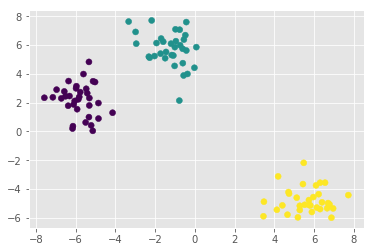

In [5]:
plt.scatter(X[:,0], X[:, 1], c=y)

Проверьте Вашу имплементацию на простых данных (без этого пункта ДЗ не считается выполненным).   
КОММЕНТАРИИ НЕ СТИРАТЬ!

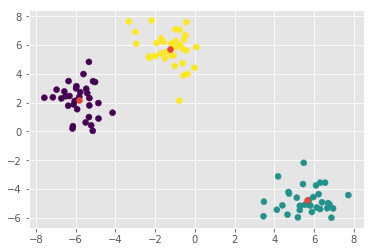

In [26]:
## Работоспособность MyKmeans
km = MyKmeans(k=3)
km.fit(X)
y_pred = km.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.scatter(km.centroids[:, 0], km.centroids[:, 1])

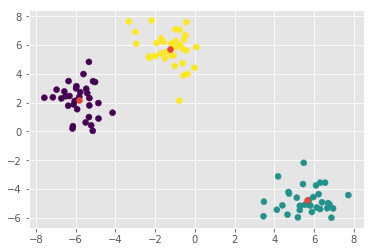

In [25]:
## Работоспособность MyKmeans++
km = MyKmeans(k=3, init='k-means')
km.fit(X)
y_pred = km.predict(X)
plt.scatter(X[:,0], X[:, 1], c=y_pred)
plt.scatter(km.centroids[:, 0], km.centroids[:, 1])

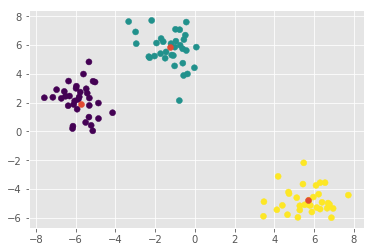

In [33]:
## Работоспособность MyKmeans с MiniBatchMyKmeans
km = MiniBatchKMeans(k=3)
km.fit(X)
y_pred = km.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.scatter(km.centroids[:, 0], km.centroids[:, 1])

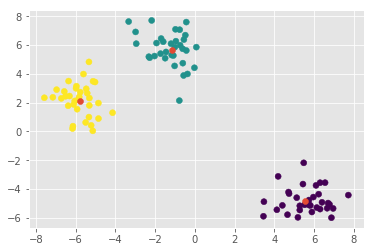

In [34]:
## Работоспособность MyKmeans++ с MiniBatchMyKmeans
km = MiniBatchKMeans(k=3, init='k-means')
km.fit(X)
y_pred = km.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.scatter(km.centroids[:, 0], km.centroids[:, 1])

Text(0,0.5,'time')

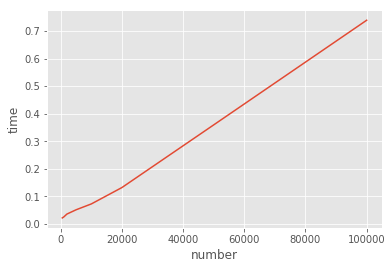

In [35]:
## Время выполнения алгоритма Kmeans из sklearn
import time
from sklearn.cluster import KMeans
sizes = [
    500,
    1000,
    2000,
    5000,
    10000,
    20000,
    50000,
    100000,
    ]
t1 = np.empty(len(sizes))
for (i, s) in enumerate(sizes):
    (X, y) = make_blobs(
        n_samples=s,
        n_features=2,
        centers=3,
        cluster_std=1,
        center_box=(-10.0, 10.0),
        shuffle=False,
        random_state=123,
        )
    km = KMeans(n_clusters=3, init='random', max_iter=10000)
    tau = time.time()
    km.fit(X)
    t1[i] = time.time() - tau
plt.plot(sizes, t1)
plt.xlabel('number')
plt.ylabel('time')


Text(0,0.5,'time')

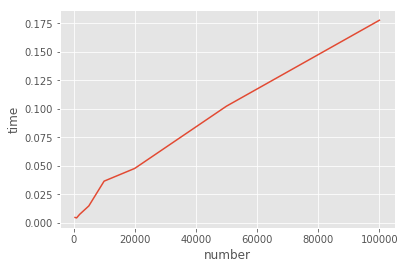

In [36]:
## Время выполнения алгоритма MyKmeans
t2 = np.empty(len(sizes))
for (i, s) in enumerate(sizes):
    (X, y) = make_blobs(
        n_samples=s,
        n_features=2,
        centers=3,
        cluster_std=1,
        center_box=(-10.0, 10.0),
        shuffle=False,
        random_state=123,
        )
    km = MyKmeans(k=3, max_iter=5)
    tau = time.time()
    km.fit(X)
    t2[i] = time.time() - tau
plt.plot(sizes, t2)
plt.xlabel('number')
plt.ylabel('time')


Text(0,0.5,'time')

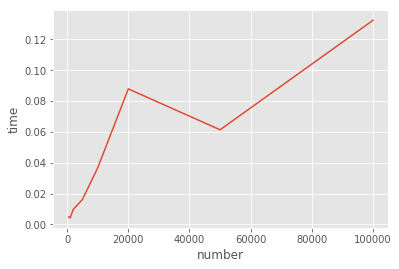

In [37]:
## Время выполнения алгоритма MyKmeans++
t3 = np.empty(len(sizes))
for (i, s) in enumerate(sizes):
    (X, y) = make_blobs(
        n_samples=s,
        n_features=2,
        centers=3,
        cluster_std=1,
        center_box=(-10.0, 10.0),
        shuffle=False,
        random_state=123,
        )
    km = MyKmeans(k=3, max_iter=300, init='k-means')
    tau = time.time()
    km.fit(X)
    t3[i] = time.time() - tau
plt.plot(sizes, t3)
plt.xlabel('number')
plt.ylabel('time')


Text(0,0.5,'time')

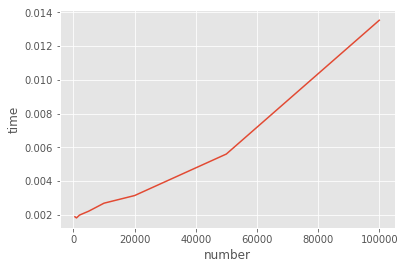

In [38]:
## Время выполнения алгоритма MyKmeans с MiniBatchMyKmeans
t4 = np.empty(len(sizes))
for (i, s) in enumerate(sizes):
    (X, y) = make_blobs(
        n_samples=s,
        n_features=2,
        centers=3,
        cluster_std=1,
        center_box=(-10.0, 10.0),
        shuffle=False,
        random_state=123,
        )
    km = MiniBatchKMeans(k=3, max_iter=300, batch_size=100)
    tau = time.time()
    km.fit(X)
    t4[i] = time.time() - tau
plt.plot(sizes, t4)
plt.xlabel('number')
plt.ylabel('time')


Text(0,0.5,'time')

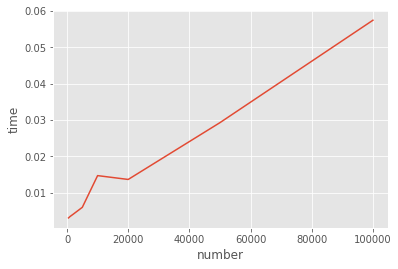

In [39]:
## Время выполнения алгоритма  MyKmeans++ с MiniBatchMyKmeans

t5 = np.empty(len(sizes))
for (i, s) in enumerate(sizes):
    (X, y) = make_blobs(
        n_samples=s,
        n_features=2,
        centers=3,
        cluster_std=1,
        center_box=(-10.0, 10.0),
        shuffle=False,
        random_state=123,
        )
    km = MiniBatchKMeans(k=3, max_iter=300, init='k-means',
                         batch_size=100)
    tau = time.time()
    km.fit(X)
    t5[i] = time.time() - tau
plt.plot(sizes, t5)
plt.xlabel('number')
plt.ylabel('time')

Text(0,0.5,'time')

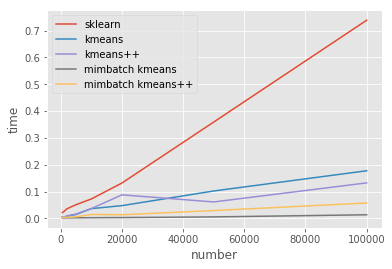

In [40]:
plt.plot(sizes, t1, label='sklearn')
plt.plot(sizes, t2, label='kmeans')
plt.plot(sizes, t3, label='kmeans++')
plt.plot(sizes, t4, label='mimbatch kmeans')
plt.plot(sizes, t5, label='mimbatch kmeans++')
plt.legend()
plt.xlabel('number')
plt.ylabel('time')

# Применение K-means на реальных данных

Загрузите [данные](https://github.com/brenden17/sklearnlab/blob/master/facebook/snsdata.csv) в которых содержится описание интересов профилей учеников старшей школы США.  (без этого пункта задание не считается выполненным).   
ВНИМАНИЕ! Проверка должна быть осуществлена на всех реализациях, иначе реализация не будет зачтена!

In [43]:
df_sns = pd.read_csv('snsdata.csv', sep=',')
df_sns.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


Данные устроены так: 
* Год выпуска
* Пол
* Возраст
* Количество друзей
* 36 ключевых слов, которые встречаются в профилe facebook (интересы, сообщества, встречи)

* Удалите все признаки кроме 36 ключевых слов.
* Нормализуйте данные - из каждого столбца вычтите его среднее значение и поделите на стандартное отклонение.
* Используйте метод k-means чтобы выделить 9 кластеров
* Попробуйте проинтерпретировать каждый кластер проанализировав полученные центройды (Некоторые кластеры могут быть очень большие и очень маленькие - плохо интерпретируются)   
КОММЕНТАРИИ НЕ СТИРАТЬ!

In [44]:
df_sns = df_sns.drop(['gradyear', 'gender', 'age', 'friends'], axis=1)
X = df_sns.values
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

/home/nariman/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [47]:
%%time
k = 9
words = df_sns.columns
## MyKMeans
km = MyKmeans(k=k)
km.fit(X)
labels = km.predict(X)
for (i, centr) in enumerate(km.centroids):
    print (words[np.argsort(centr)[-5:]], labels[labels
           == i].size)

Index(['god', 'rock', 'music', 'band', 'marching'], dtype='object') 578
Index(['drunk', 'sex', 'hair', 'drugs', 'kissed'], dtype='object') 885
Index(['music', 'church', 'god', 'jesus', 'bible'], dtype='object') 378
Index(['rock', 'music', 'god', 'die', 'death'], dtype='object') 1909
Index(['cute', 'music', 'clothes', 'shopping', 'swimming'], dtype='object') 495
Index(['drunk', 'bible', 'jesus', 'tennis', 'blonde'], dtype='object') 19349
Index(['clothes', 'mall', 'shopping', 'abercrombie', 'hollister'], dtype='object') 843
Index(['mall', 'dance', 'cute', 'sexy', 'hot'], dtype='object') 986
Index(['mall', 'baseball', 'shopping', 'basketball', 'football'], dtype='object') 4577
CPU times: user 5.97 s, sys: 140 ms, total: 6.11 s
Wall time: 1.63 s


In [52]:
## MyKMeans++
km = MyKmeans(k=k, init='k-means')
km.fit(X)
labels = km.predict(X)
for (i, centr) in enumerate(km.centroids):
    print (words[np.argsort(centr)[-5:]], labels[labels
           == i].size)

Index(['bible', 'jesus', 'death', 'tennis', 'blonde'], dtype='object') 19324
Index(['die', 'hair', 'drunk', 'kissed', 'drugs'], dtype='object') 1103
Index(['clothes', 'mall', 'shopping', 'abercrombie', 'hollister'], dtype='object') 849
Index(['death', 'church', 'god', 'jesus', 'bible'], dtype='object') 549
Index(['god', 'rock', 'music', 'band', 'marching'], dtype='object') 767
Index(['clothes', 'hot', 'mall', 'cute', 'shopping'], dtype='object') 4302
Index(['volleyball', 'football', 'softball', 'baseball', 'basketball'], dtype='object') 2068
Index(['music', 'rock', 'hair', 'sex', 'kissed'], dtype='object') 119
Index(['shopping', 'music', 'cute', 'dress', 'dance'], dtype='object') 919


In [51]:
## MyKMeans с MiniBatchMyKMeans

batch_size = 100
km = MiniBatchKMeans(k=k, batch_size=batch_size)
km.fit(X)
labels = km.predict(X)
for (i, centr) in enumerate(km.centroids):
    print (words[np.argsort(centr)[-5:]], labels[labels
           == i].size)

Index(['shopping', 'rock', 'abercrombie', 'cute', 'dance'], dtype='object') 3711
Index(['volleyball', 'death', 'cute', 'church', 'god'], dtype='object') 1428
Index(['football', 'die', 'volleyball', 'band', 'marching'], dtype='object') 12378
Index(['baseball', 'tennis', 'cute', 'bible', 'hot'], dtype='object') 1239
Index(['sexy', 'kissed', 'rock', 'hair', 'sex'], dtype='object') 361
Index(['drugs', 'abercrombie', 'sports', 'baseball', 'basketball'], dtype='object') 1613
Index(['hollister', 'drugs', 'kissed', 'hair', 'clothes'], dtype='object') 277
Index(['drugs', 'tennis', 'marching', 'bible', 'blonde'], dtype='object') 8714
Index(['cute', 'rock', 'drugs', 'jesus', 'music'], dtype='object') 279


In [50]:
## MyKMeans++ с MiniBatchMyKMeans

km = MiniBatchKMeans(k=k, batch_size=batch_size, init='k-means')
km.fit(X)
labels = km.predict(X)
for (i, centr) in enumerate(km.centroids):
    print (words[np.argsort(centr)[-5:]], labels[labels
           == i].size)

Index(['shopping', 'mall', 'band', 'dance', 'church'], dtype='object') 1005
Index(['hot', 'sports', 'sexy', 'blonde', 'bible'], dtype='object') 21394
Index(['blonde', 'god', 'hair', 'sports', 'tennis'], dtype='object') 259
Index(['hot', 'volleyball', 'swimming', 'sports', 'soccer'], dtype='object') 1135
Index(['jesus', 'hot', 'basketball', 'death', 'football'], dtype='object') 1308
Index(['football', 'mall', 'hot', 'basketball', 'baseball'], dtype='object') 561
Index(['dress', 'kissed', 'clothes', 'rock', 'cute'], dtype='object') 885
Index(['cute', 'cheerleading', 'drugs', 'volleyball', 'shopping'], dtype='object') 2932
Index(['hair', 'shopping', 'hollister', 'clothes', 'abercrombie'], dtype='object') 521


In [22]:
## Вывод

Есть некоторые сравнительно крупные кластеры, которые неплохо интерпретируются, есть такие, которые абсолютно непонятны. Возможно количество кластеров неоптимально, возможно случайный элемент кластеризации сработал не так, как ожидалось.
По поводу самих методов:
Все предсказуемо - минибатч дает хорошее ускорение, если не меняется число итераций, улучшеный k-mean срабатывает хорошо, но непонятно, что будет на более сложно расположенных данных. Каждое улучшение следует применять тщательно задумавшись.